### Ομαδοποίηση με χρήση της βιβλιοθήκης pycaret

* Η βιβλιοθήκη pycaret περιλαμβάνει και αλγορίθμους ομαδοποίησης (clustering).

* Οι αλγόριθμοι ελέγχονται μέσω πληθώρας διαφορετικών μετρικών (π.χ: silhouette score, Calinsky-Harabasz index, κλπ).

In [1]:
import pandas as pd
from pycaret import clustering as clust

In [2]:
df = pd.read_csv("./data/uci_heart_failure/uci_hf_df.csv")
# df = df.drop(['tag'], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,tag
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
293,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
294,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
295,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1


* "Στήνουμε" το πείραμα της βιβλιοθήκης pycaret.

* Εφόσον πρόκειται για πείραμα μη-επιβλεπόμενης μάθησης (unsupervised learning: clustering), θα πρέπει να αγνοήσουμε την μεταβλητή εξόδου που χρησιμοποιούσαμε στο πείραμα δυαδικής ταξινόμησης (binary classification).

In [3]:
s = clust.setup(df, session_id = 123, ignore_features=["tag"], log_experiment=True, 
                log_plots=True, experiment_name="heart_fail")

,Description,Value
0,Session id,123
1,Original data shape,"(297, 14)"
2,Transformed data shape,"(297, 13)"
3,Ignore features,1
4,Numeric features,13
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


* Μπορούμε εύκολα να δούμε ποιοί αλγόριθμοι clustering είναι διαθέσιμοι

In [4]:
clust.models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [5]:
kmeans = clust.create_model('kmeans', num_clusters=2)
# hclust = clust.create_model("hclust", num_clusters=2)
# dbscan = clust.create_model("dbscan", num_clusters=2)
# spectral = clust.create_model("sc", num_clusters=2)
# kmodes = clust.create_model("kmodes", num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3858,235.1462,0.9731,0,0,0


In [6]:
kmeans_cluster = clust.assign_model(kmeans)
# hclust_cluster = clust.assign_model(hclust)
# dbscan_cluster = clust.assign_model(dbscan)
# spectral_cluster = clust.assign_model(spectral)
# kmodes_cluster = clust.assign_model(kmodes)

* Δημιουργούμε ένα 2D PCA plot με τα δείγματα του dataset χρωματισμένα με βάση το cluster label που τους έχει δώσει ο αλγόριθμος clustering που χρησιμοποιήθηκε (π.χ: kmeans).

In [7]:
# plot pca cluster plot 
clust.plot_model(kmeans, plot = 'cluster')

* Μπορούμε να προσθέσουμε και το πραγματικό label των δειγμάτων

In [8]:
clust.plot_model(kmeans, feature="tag", label=True)

* Interactive 3D T-SNE plot

In [9]:
# plot elbow
clust.plot_model(kmeans, feature="tag", plot = 'tsne', label=True)

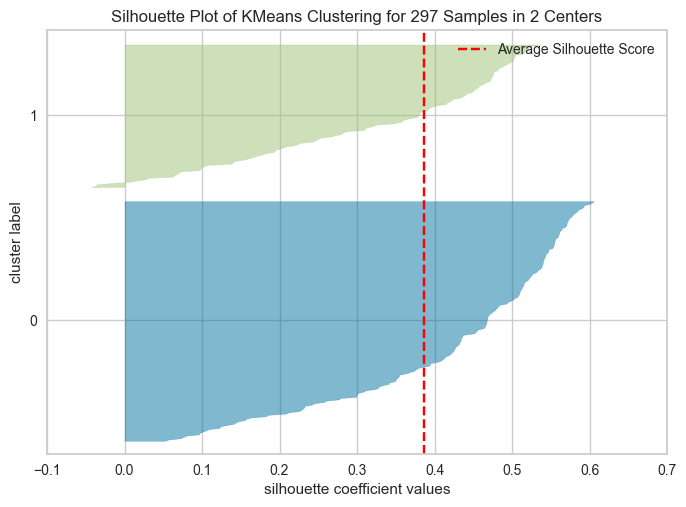

In [10]:
# plot silhouette
clust.plot_model(kmeans, plot = 'silhouette')

In [ ]:
clust.plot_model(kmeans, plot="distance")

In [11]:
clust.plot_model(kmeans, plot="distribution")